In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')


In [5]:
# creating database connection
conn = sqlite3.connect('inventory.db')
#fetching vendor summary data
df = pd.read_sql_query("select * from vendor_sales_summary", conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897


In [6]:
# summary statistics
df.describe().T


,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05
TotalSalesDollars,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalSalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05


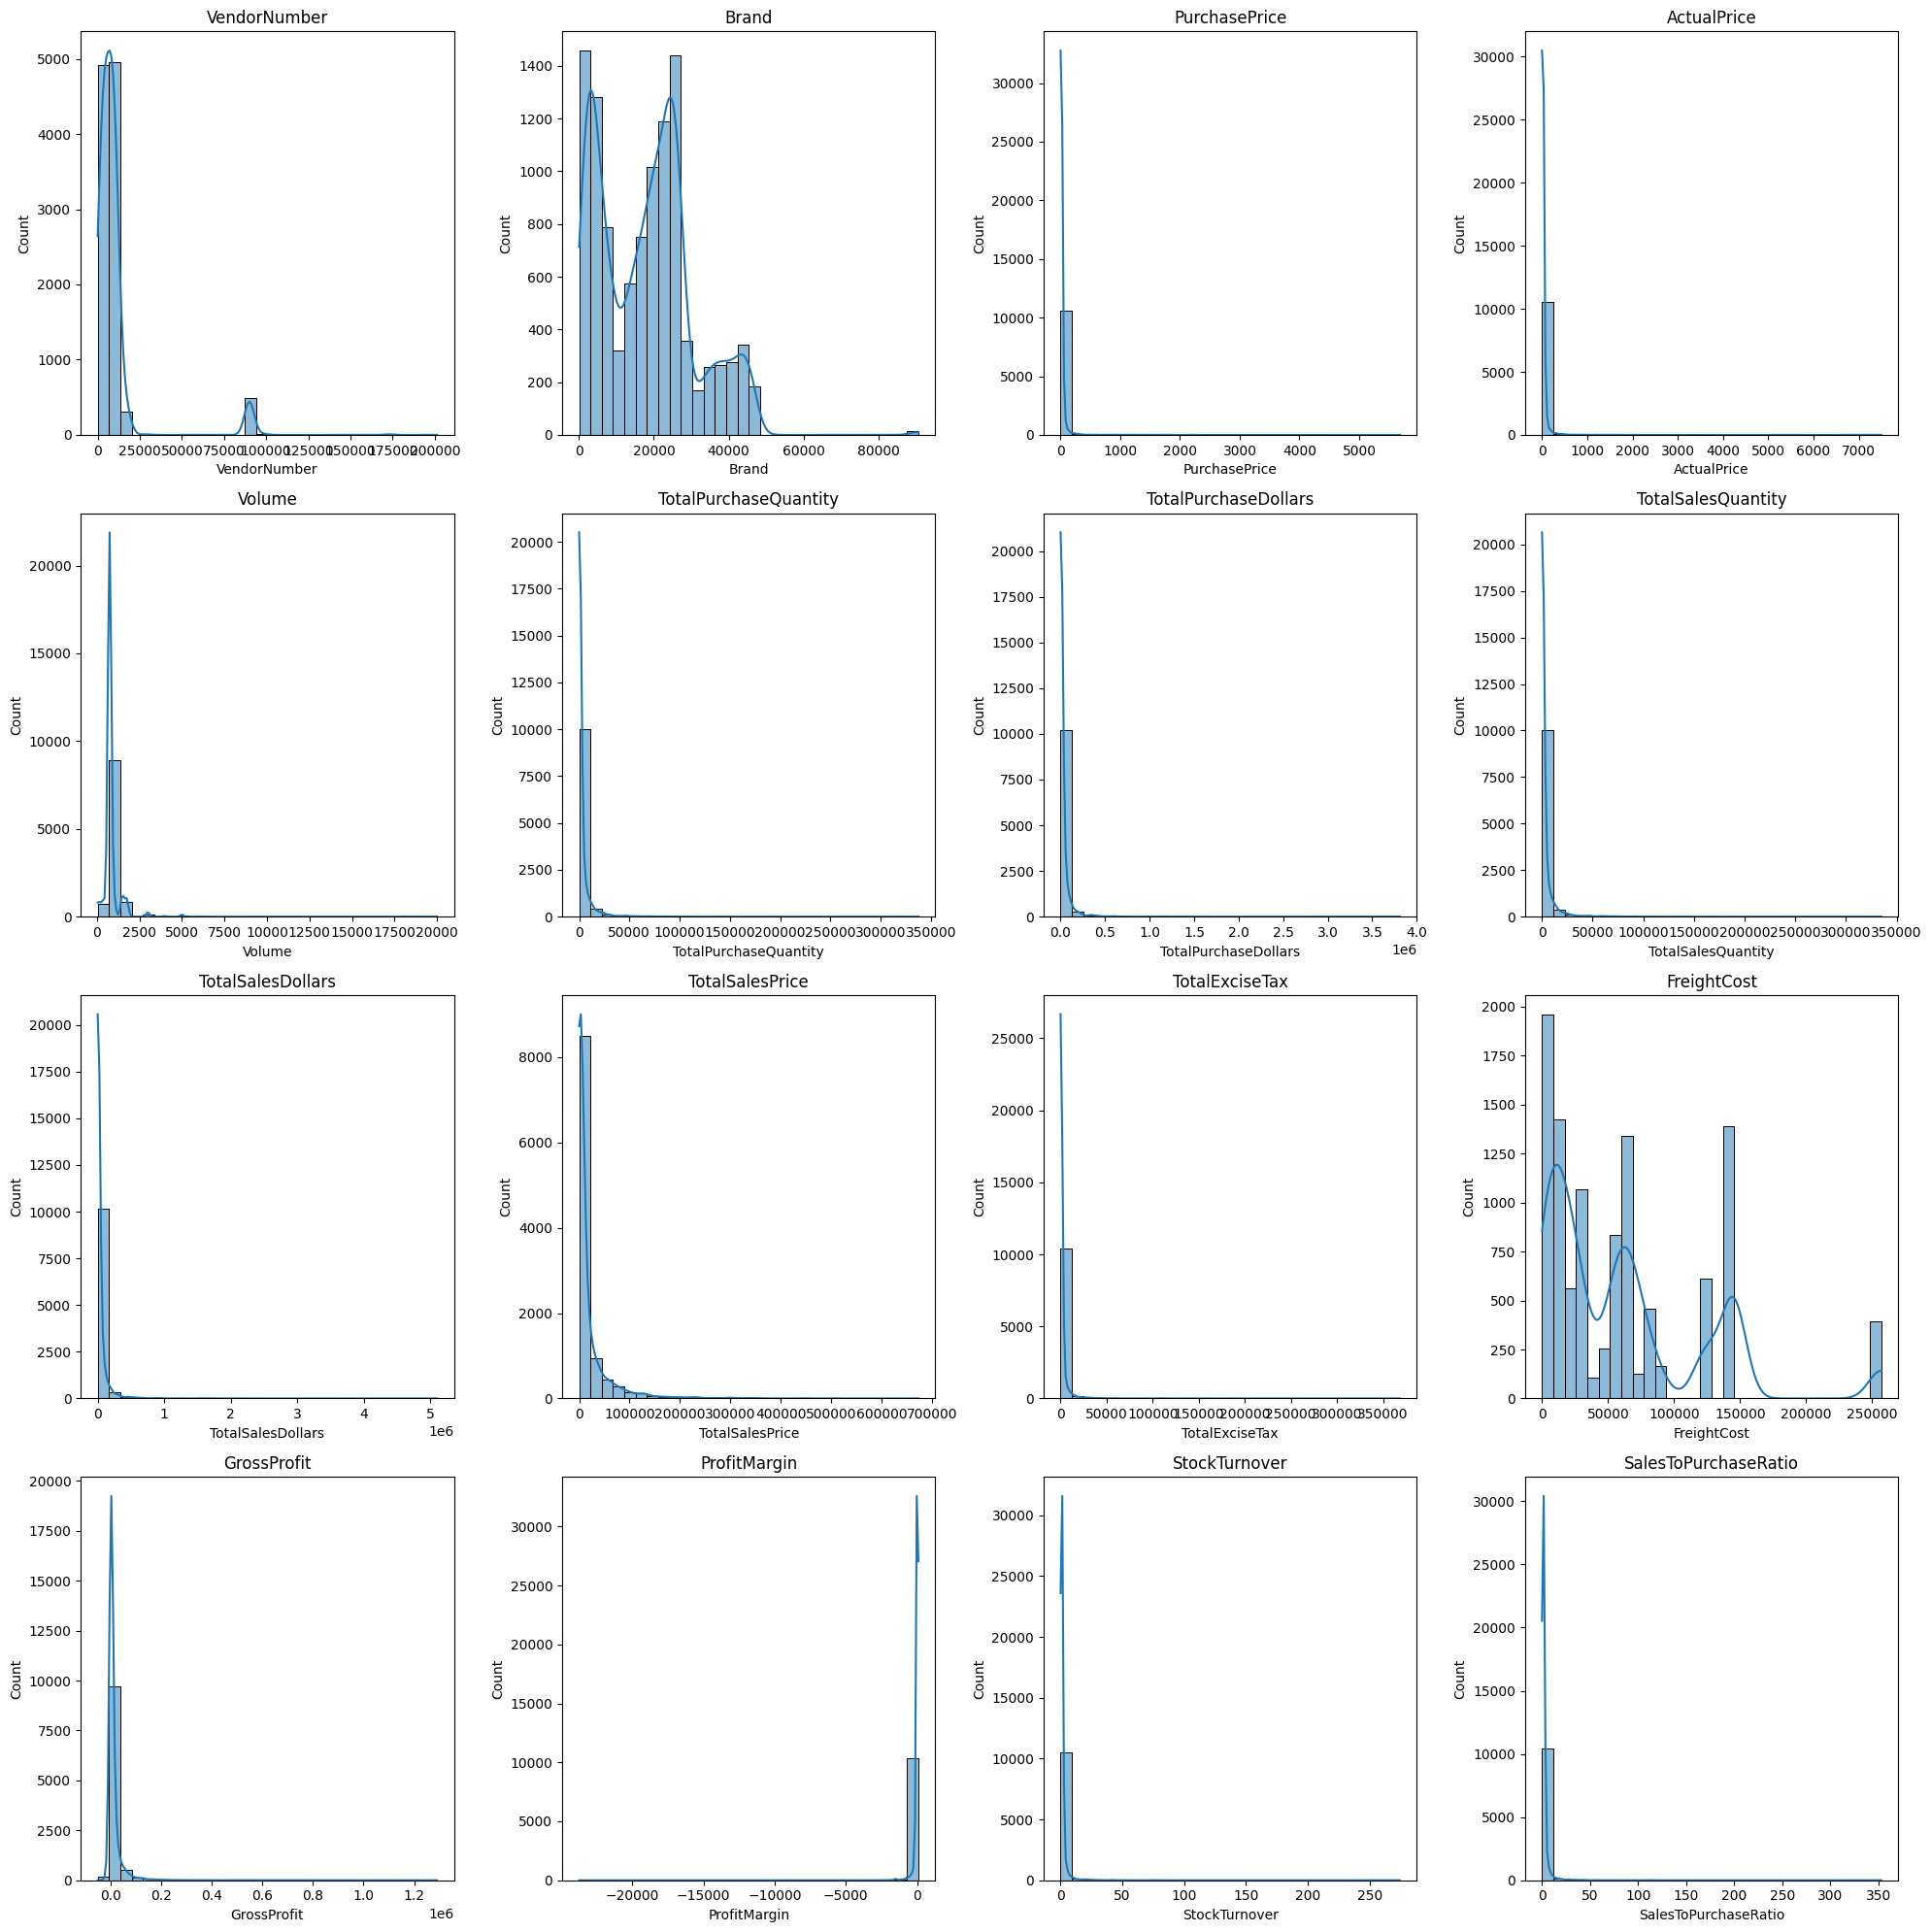

In [ ]:
# ✅ Correct version for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 20))  # Adjust size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # 4x4 grid, adjust as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


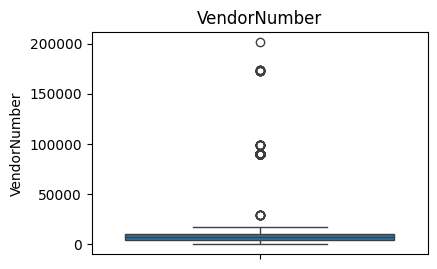

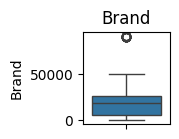

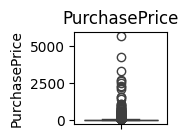

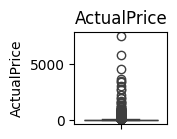

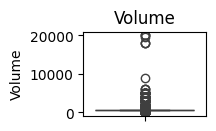

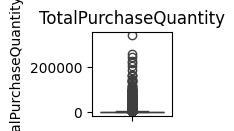

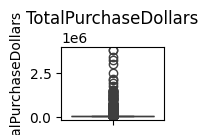

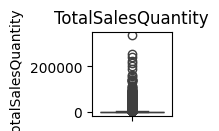

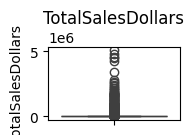

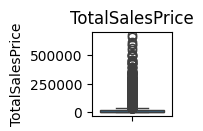

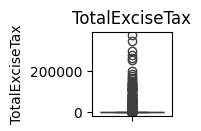

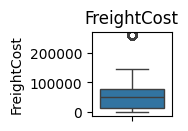

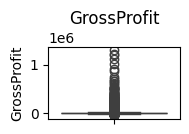

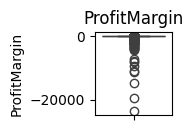

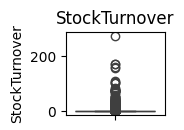

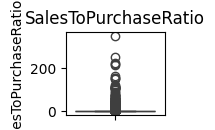

In [13]:
# outliers detection with Boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()
    plt.show()

In [14]:
#let's filter the data by removing inconsistencies
df = pd.read_sql_query("""SELECT * FROM vendor_sales_Summary
                       WHERE GrossProfit>0
                        AND ProfitMargin > 0
                       AND TotalSalesQuantity >0""", conn)

In [15]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388


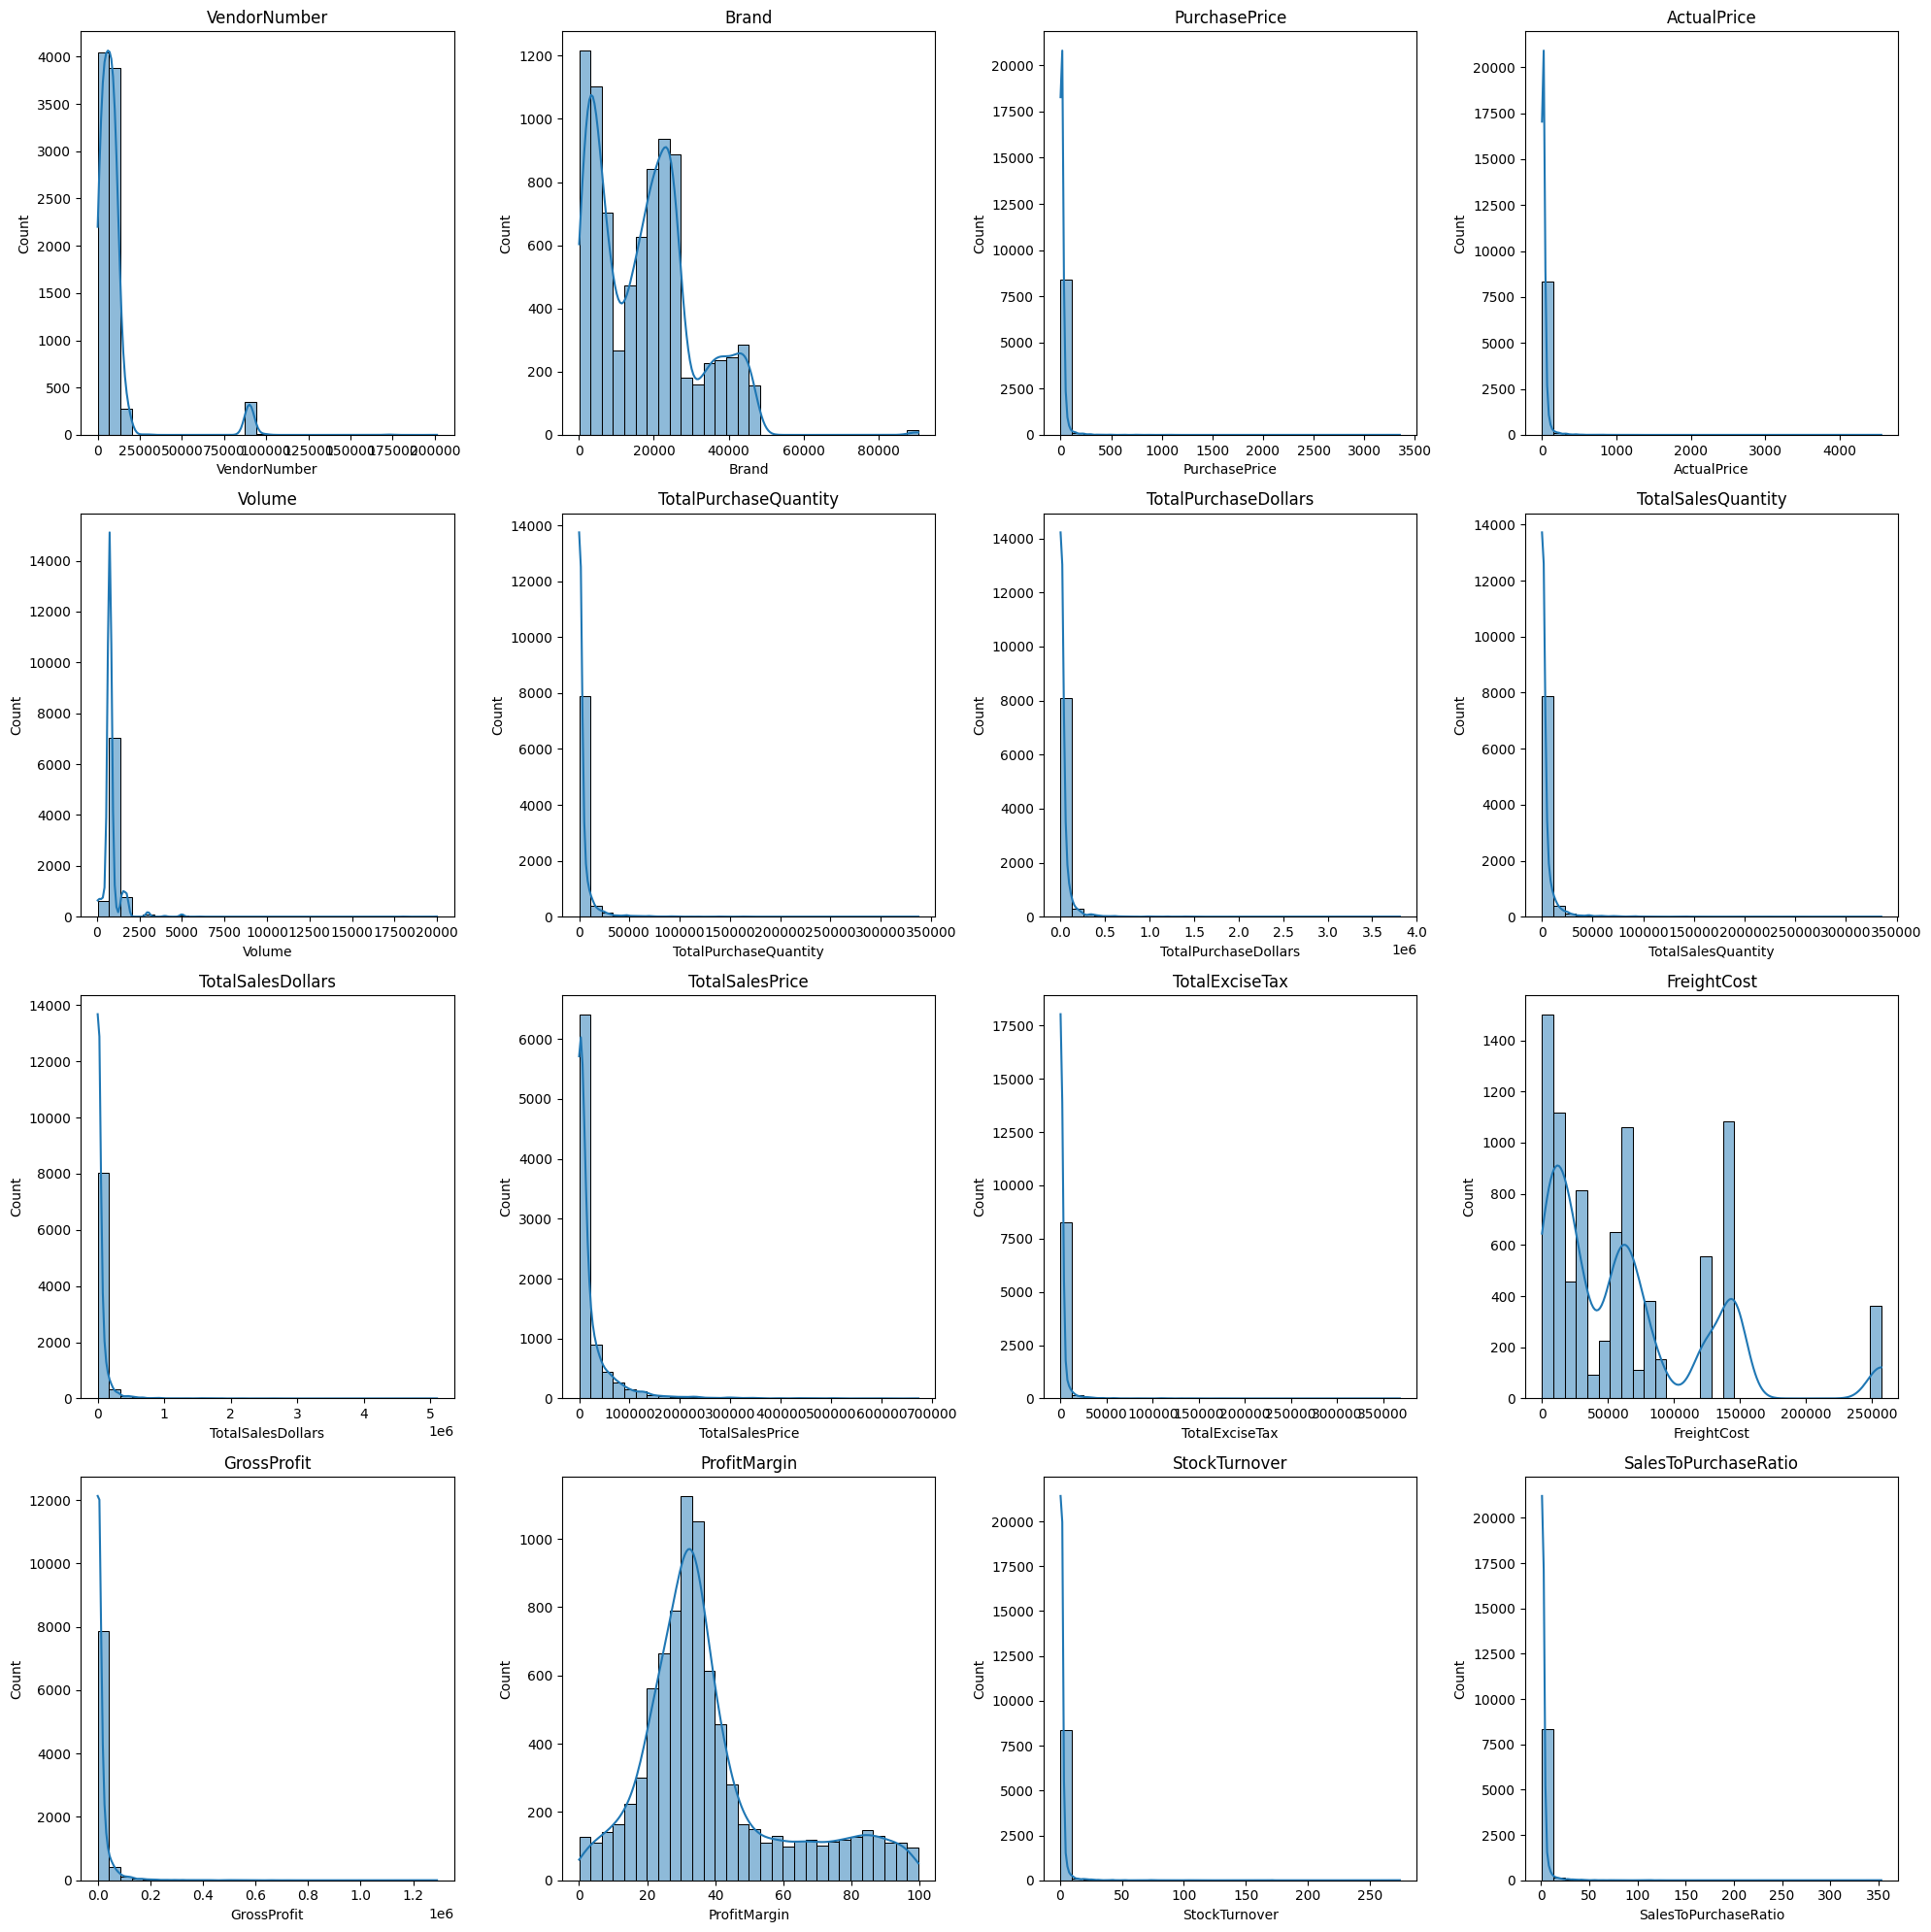

In [16]:
# ✅ Correct version for Numerical Columns
numerical_cols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(20, 20))  # Adjust size as needed

for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # 4x4 grid, adjust as needed
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(col)

plt.tight_layout()
plt.show()


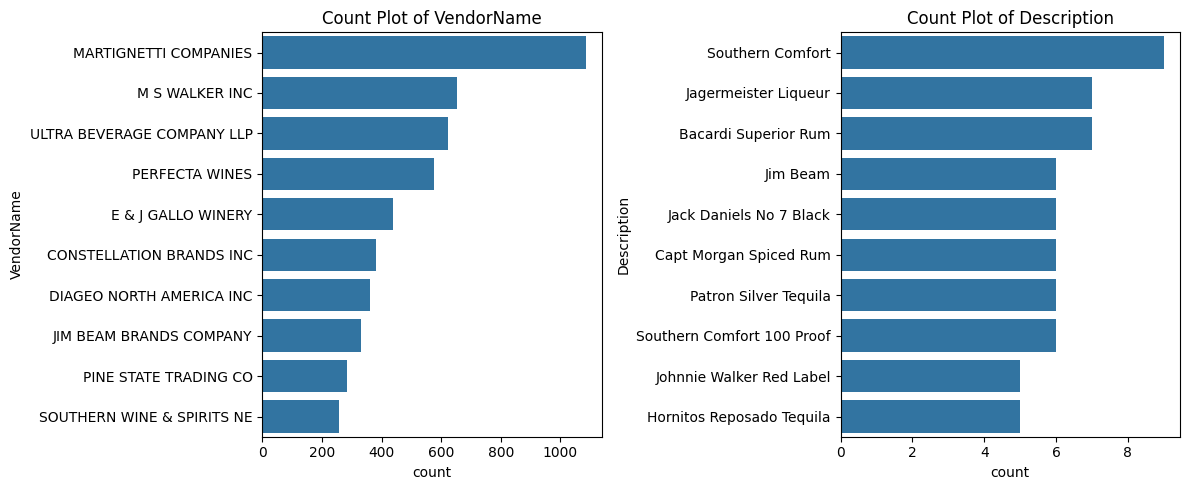

In [17]:
# Count PLots for Categorical Columns
categorical_cols = ["VendorName", "Description"]
plt.figure(figsize=(12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i + 1)  
    sns.countplot(y=df[col], order=df[col].value_counts().index[:10])# top 10 categories
    plt.title(f"Count Plot of {col}")

plt.tight_layout()
plt.show()


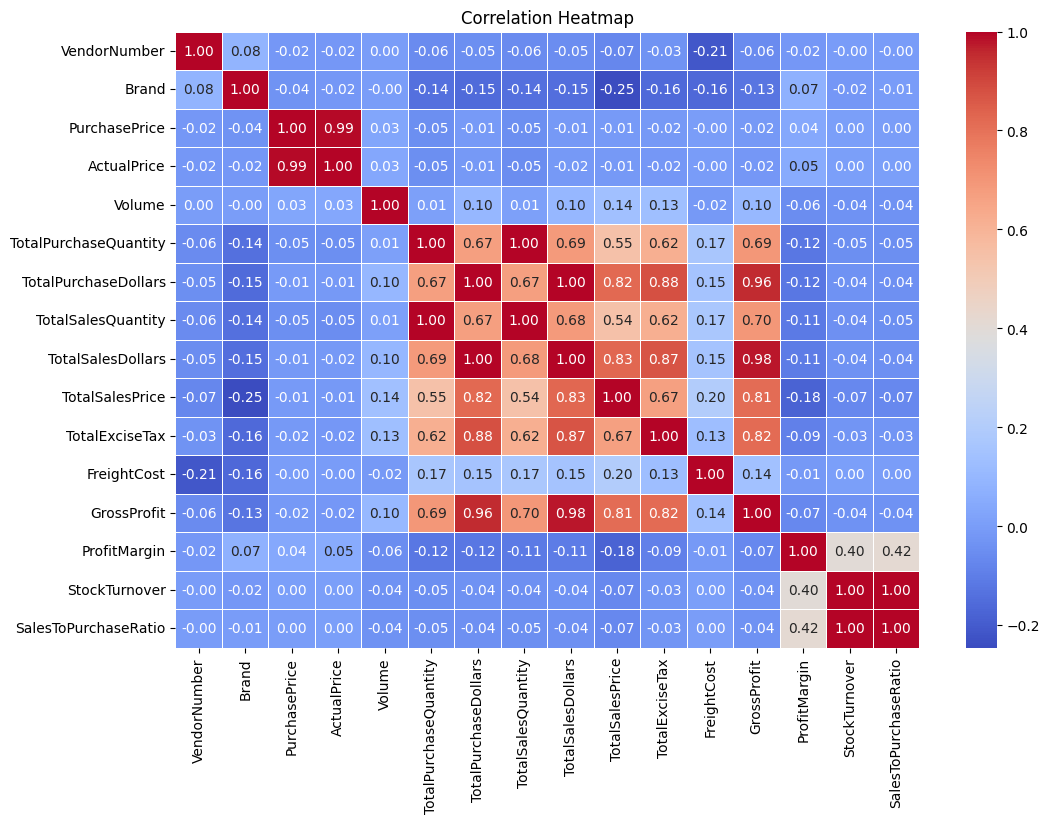

In [19]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [25]:
#DATA ANALYSIS

#Identify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performance but higher profit margins
brand_performance =df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [26]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [27]:
low_sales_threshold

np.float64(560.299)

In [28]:
high_margin_threshold

np.float64(64.97017552750113)

In [29]:
# Filter brands with low sales but high profit margin
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
     (brand_performance['ProfitMargin'] >= high_margin_threshold)

]
print("Brands with low Sales but High Profit Margin:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but High Profit Margin:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [31]:
brand_performance= brand_performance[brand_performance['TotalSalesDollars']<1000]# for better visualization

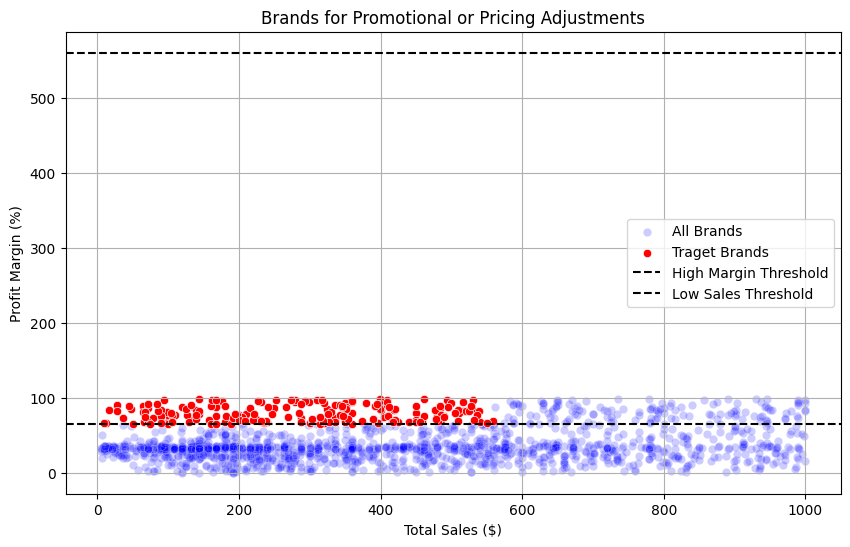

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=brand_performance, x= 'TotalSalesDollars', y = 'ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data=target_brands, x= 'TotalSalesDollars', y = 'ProfitMargin', color="red", label="Traget Brands")
plt.axhline(high_margin_threshold, linestyle = '--', color = 'black', label = "High Margin Threshold")
plt.axhline(low_sales_threshold, linestyle = '--', color = 'black', label = "Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Profit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

In [35]:
# Which vendors and brands demonstrate highest sales performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)
top_vendors

VendorName
DIAGEO NORTH AMERICA INC      67990099.42
MARTIGNETTI COMPANIES         39330359.36
PERNOD RICARD USA             32063196.19
JIM BEAM BRANDS COMPANY       31423020.46
BACARDI USA INC               24854817.14
CONSTELLATION BRANDS INC      24218745.65
E & J GALLO WINERY            18399899.46
BROWN-FORMAN CORP             18247230.65
ULTRA BEVERAGE COMPANY LLP    16502544.31
M S WALKER INC                14706458.51
Name: TotalSalesDollars, dtype: float64

In [ ]:
top_brands



Description
Jack Daniels No 7 Black    7964746.76
Tito's Handmade Vodka      7399657.58
Grey Goose Vodka           7209608.06
Capt Morgan Spiced Rum     6356320.62
Absolut 80 Proof           6244752.03
Jameson Irish Whiskey      5715759.69
Ketel One Vodka            5070083.56
Baileys Irish Cream        4150122.07
Kahlua                     3604858.66
Tanqueray                  3456697.90
Name: TotalSalesDollars, dtype: float64

In [42]:
def format_dollars(x):
    """Format a number in millions with dollar sign and 2 decimal places"""
    return "${:,.2f}M".format(x / 1_000_000)

top_brands.apply(lambda x: format_dollars(x))

Description
Jack Daniels No 7 Black    $7.96M
Tito's Handmade Vodka      $7.40M
Grey Goose Vodka           $7.21M
Capt Morgan Spiced Rum     $6.36M
Absolut 80 Proof           $6.24M
Jameson Irish Whiskey      $5.72M
Ketel One Vodka            $5.07M
Baileys Irish Cream        $4.15M
Kahlua                     $3.60M
Tanqueray                  $3.46M
Name: TotalSalesDollars, dtype: object

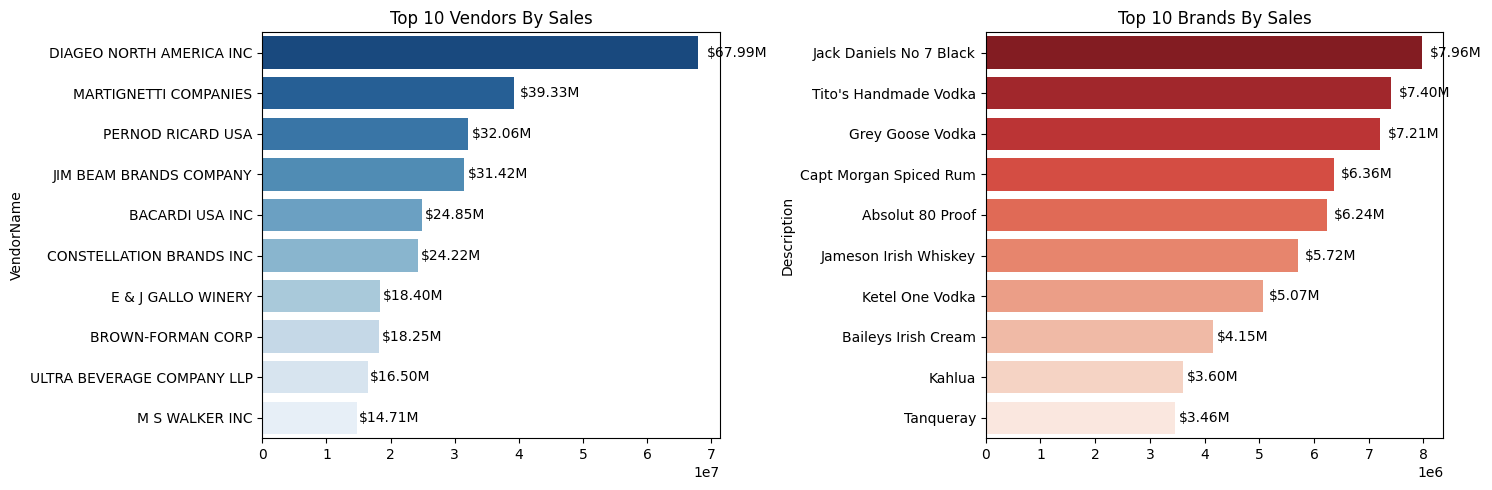

In [48]:
plt.figure(figsize=(15, 5))

# ✅ Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors By Sales")

for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

# ✅ Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands By Sales")

for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left',
        va='center',
        fontsize=10,
        color='black'
    )

plt.tight_layout()
plt.show()


In [57]:
# Which vendors Contributr to the most to total purchase Dollars

vendor_performance= df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'

}).reset_index()
vendor_performance.shape

(119, 4)

In [65]:
vendor_performance['Purchase_Contribution%']= vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()

In [66]:
round(vendor_performance.sort_values('Purchase_Contribution%', ascending = False), 2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,0.16
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,0.08
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,0.08
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,0.08
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,0.06
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [67]:
# Display Top 10 Vendors
top_vendors=  vendor_performance.head(10)
top_vendors['TotalSalesDollars']= top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars']= top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit']= top_vendors['GrossProfit'].apply(format_dollars)
top_vendors








,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ADAMBA IMPORTS INTL INC,$0.00M,$0.00M,$0.00M,0.000001
1,ALISA CARR BEVERAGES,$0.03M,$0.08M,$0.10M,0.000084
2,ALTAMAR BRANDS LLC,$0.01M,$0.00M,$0.02M,0.000038
3,AMERICAN SPIRITS EXCHANGE,$0.00M,$0.00M,$0.00M,0.000003
4,AMERICAN VINTAGE BEVERAGE,$0.10M,$0.04M,$0.14M,0.000340
5,ATLANTIC IMPORTING COMPANY,$0.04M,$0.02M,$0.06M,0.000134
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,0.056719
7,BANFI PRODUCTS CORP,$1.61M,$1.02M,$2.63M,0.005232
8,BLACK PRINCE DISTILLERY INC,$0.01M,$0.01M,$0.01M,0.000019
9,BLACK ROCK SPIRITS LLC,$0.00M,$0.00M,$0.00M,0.000004


In [68]:
top_vendors['Purchase_Contribution%'].sum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%
0,ADAMBA IMPORTS INTL INC,$0.00M,$0.00M,$0.00M,0.000001
1,ALISA CARR BEVERAGES,$0.03M,$0.08M,$0.10M,0.000084
2,ALTAMAR BRANDS LLC,$0.01M,$0.00M,$0.02M,0.000038
3,AMERICAN SPIRITS EXCHANGE,$0.00M,$0.00M,$0.00M,0.000003
4,AMERICAN VINTAGE BEVERAGE,$0.10M,$0.04M,$0.14M,0.000340
5,ATLANTIC IMPORTING COMPANY,$0.04M,$0.02M,$0.06M,0.000134
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,0.056719
7,BANFI PRODUCTS CORP,$1.61M,$1.02M,$2.63M,0.005232
8,BLACK PRINCE DISTILLERY INC,$0.01M,$0.01M,$0.01M,0.000019
9,BLACK ROCK SPIRITS LLC,$0.00M,$0.00M,$0.00M,0.000004


In [69]:
top_vendors['Cumulative_Contribution%'] = top_vendors['Purchase_Contribution%'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,Purchase_Contribution%,Cumulative_Contribution%
0,ADAMBA IMPORTS INTL INC,$0.00M,$0.00M,$0.00M,0.000001,0.000001
1,ALISA CARR BEVERAGES,$0.03M,$0.08M,$0.10M,0.000084,0.000085
2,ALTAMAR BRANDS LLC,$0.01M,$0.00M,$0.02M,0.000038,0.000123
3,AMERICAN SPIRITS EXCHANGE,$0.00M,$0.00M,$0.00M,0.000003,0.000126
4,AMERICAN VINTAGE BEVERAGE,$0.10M,$0.04M,$0.14M,0.000340,0.000466
5,ATLANTIC IMPORTING COMPANY,$0.04M,$0.02M,$0.06M,0.000134,0.000600
6,BACARDI USA INC,$17.43M,$7.42M,$24.85M,0.056719,0.057319
7,BANFI PRODUCTS CORP,$1.61M,$1.02M,$2.63M,0.005232,0.062552
8,BLACK PRINCE DISTILLERY INC,$0.01M,$0.01M,$0.01M,0.000019,0.062571
9,BLACK ROCK SPIRITS LLC,$0.00M,$0.00M,$0.00M,0.000004,0.062574


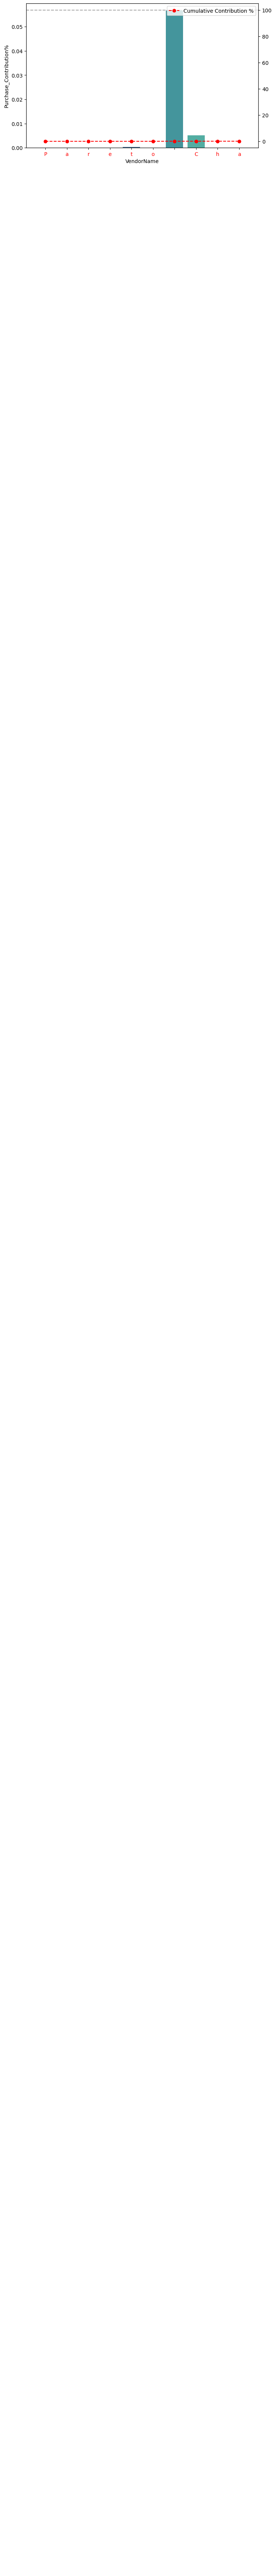

In [75]:
fig, ax1 = plt.subplots(figsize=(8,5))
 
 # Bar plot for Purchase Contribution%
sns.barplot(x=top_vendors['VendorName'], y=top_vendors['Purchase_Contribution%'], palette="mako", ax= ax1)

for i, value in enumerate(top_vendors['Purchase_Contribution%']):
    ax1.text(i, value-1, str(value)+'%', ha = 'center', fontsize=10, color ='white')

    # Line Plot for Cumulative Contribution%
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['Cumulative_Contribution%'], color='red', marker='o', linestyle='dashed', label='Cumulative Contribution %')

ax1.set_xticklabels('Purchase_Contribution%', color='blue')
ax1.set_xticklabels('Cummulative_Contribution%',color='red')
ax1.set_xticklabels('Vendors')
ax1.set_xticklabels('Pareto Chart: Vendor Contribution to Total Purchases')


ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')
plt.show()


 

In [82]:
#  How much  of total procurement is dependent on the top vendors?
print(f"Total Purchase Contribution of top 10 vendors is {round(top_vendors['Purchase_Contribution%'].sum(), 2)} %")


Total Purchase Contribution of top 10 vendors is 0.06 %


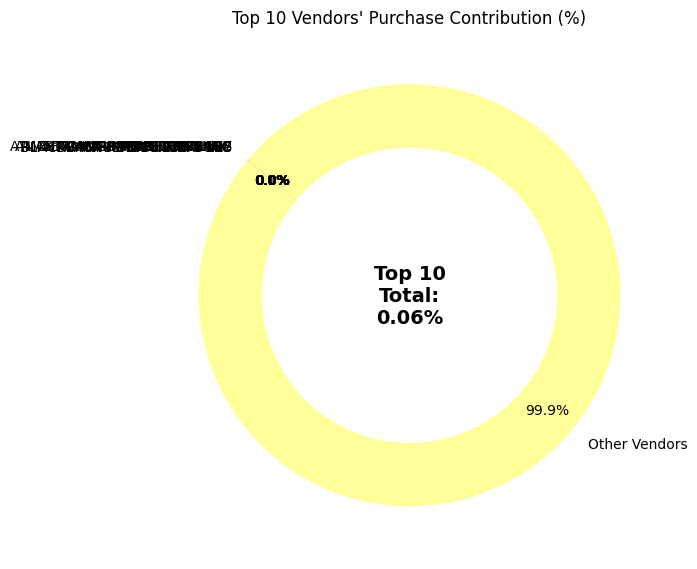

In [86]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['Purchase_Contribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# ✅ Donut chart
fig, ax = plt.subplots(figsize=(7, 7))  # Slightly smaller for VS Code

wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw white circle in the center
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# ✅ Add Total Contribution text in the center
plt.text(
    0, 0,
    f"Top 10\nTotal:\n{total_contribution:.2f}%",
    fontsize=14,
    fontweight='bold',
    ha='center',
    va='center'
)

plt.title("Top 10 Vendors' Purchase Contribution (%)")
plt.tight_layout()
plt.show()


In [89]:
#  Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

df['UnitPurchasePrice']= df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']

In [90]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,142049.0,5101919.51,672819.31,260999.20,68601.68,1290667.91,25.297693,0.979108,1.338647,26.27
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,160247.0,4819073.49,561512.37,294438.66,144929.24,1015032.27,21.062810,0.976890,1.266830,23.19
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,187140.0,4538120.60,461140.15,343854.07,123780.22,1119816.92,24.675786,0.998575,1.327594,18.24
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,200412.0,4475972.88,420050.01,368242.80,257032.07,1214774.94,27.139908,0.993703,1.372493,16.17
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,135838.0,4223107.62,545778.28,249587.83,257032.07,1199901.61,28.412764,0.983556,1.396897,21.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8559,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,5.0,15.95,10.96,0.55,27100.41,13.31,83.448276,2.500000,6.041667,1.32
8560,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,134.0,65.66,1.47,7.04,50293.62,63.32,96.436186,22.333333,28.059829,0.39
8561,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,2.0,1.98,0.99,0.10,14069.87,0.50,25.252525,1.000000,1.337838,0.74
8562,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,72.0,143.28,77.61,15.12,257032.07,141.81,98.974037,72.000000,97.469388,1.47


In [92]:
df['OrderSize']= pd.qcut(df['TotalPurchaseQuantity'], q=3, labels=["Small", "Medium", "Large"])

In [93]:
df[['OrderSize', 'TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,145080
1,Large,164038
2,Large,187407
3,Large,201682
4,Large,138109
...,...,...
8559,Small,2
8560,Small,6
8561,Small,2
8562,Small,1


In [94]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.486414
Large,10.777625


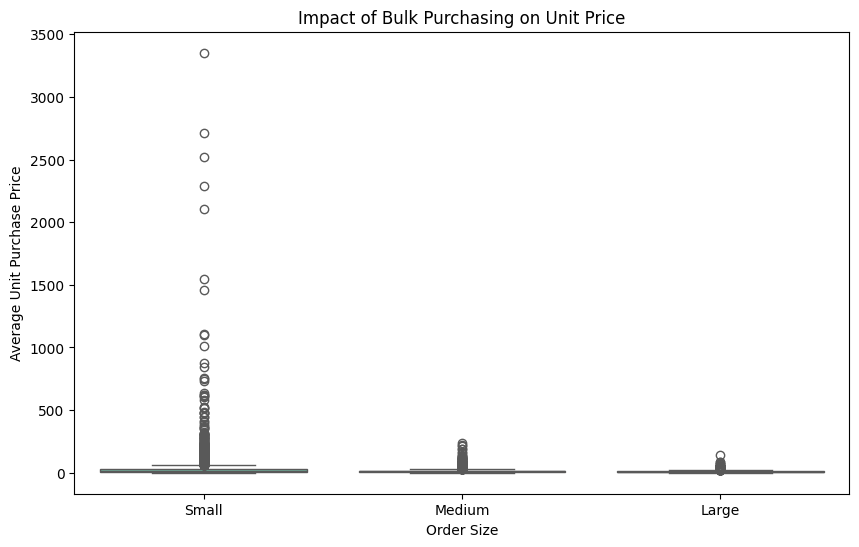

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()


In [99]:
# Which Vendors have low inventory turnover,indicating excess stock and slow-moving products?
df[df['StockTurnover'] < 1] \
    .groupby('VendorName')[['StockTurnover']] \
    .mean() \
    .sort_values('StockTurnover', ascending=True).head(10)


,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569


In [102]:
# ✅ Define your dollars-in-millions formatter
def format_dollars_million(x):
    return f"${x / 1_000_000:,.2f}M"

# ✅ Calculate Unsold Inventory Value (example: quantity * purchase price)
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]

# ✅ Compute total unsold capital in millions
total_unsold = df["UnsoldInventoryValue"].sum()

# ✅ Print nicely formatted result
print('Total Unsold Capital:', format_dollars_million(total_unsold))


Total Unsold Capital: $2.71M


In [105]:
def format_dollars_k(x):
    return f"${x / 1_000:,.2f}K"

inventory_value_per_vendor = (
    df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()
    .sort_values(by="UnsoldInventoryValue", ascending=False)
)

inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars_k)

print(inventory_value_per_vendor.head(10))


                   VendorName UnsoldInventoryValue
25   DIAGEO NORTH AMERICA INC             $722.21K
46    JIM BEAM BRANDS COMPANY             $554.67K
68          PERNOD RICARD USA             $470.63K
116  WILLIAM GRANT & SONS INC             $401.96K
30         E & J GALLO WINERY             $228.28K
79             SAZERAC CO INC             $198.44K
11          BROWN-FORMAN CORP             $177.73K
20   CONSTELLATION BRANDS INC             $133.62K
61      MOET HENNESSY USA INC             $126.48K
77     REMY COINTREAU USA INC             $118.60K


In [106]:
# What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors

top_threshold= df["TotalSalesDollars"].quantile(0.75)
low_threshold= df["TotalSalesDollars"].quantile(0.25)


In [107]:
top_vendors= df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors= df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()


In [108]:
top_vendors

0       25.297693
1       21.062810
2       24.675786
3       27.139908
4       28.412764
          ...    
3523    79.684817
3681    85.782102
4751    93.085860
4920    95.012530
5050    94.271857
Name: ProfitMargin, Length: 2141, dtype: float64

In [109]:
low_vendors

5631     4.111764
5652     6.145626
5701    12.007271
5704     1.677308
5724     7.239599
          ...    
8559    83.448276
8560    96.436186
8561    25.252525
8562    98.974037
8563    99.166079
Name: ProfitMargin, Length: 2141, dtype: float64

In [114]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error



✅ Columns: Index(['VendorNumber', 'VendorName', 'Brand', 'PurchasePrice', 'Volume',
       'ActualPrice', 'TotalPurchaseQuantity', 'TotalPurchaseDollars',
       'TotalSalesDollars', 'TotalSalesPrice', 'TotalSalesQuantity',
       'TotalExciseTax', 'TotalFreightCost'],
      dtype='object')

✅ Added ProfitMargin column.
                                VendorName  ProfitMargin
0  IRA GOLDMAN AND WILLIAMS, LLP               71.331591
1  IRA GOLDMAN AND WILLIAMS, LLP             -807.029478
2              AAPER ALCOHOL & CHEMICAL CO           NaN
3              ADAMBA IMPORTS INTL INC         36.672675
4              ADAMBA IMPORTS INTL INC               NaN

✅ Top Vendors: (7488, 15)
✅ Low Vendors: (3026, 15)

✅ Top Vendors 95% CI: (42.11, 43.01), Mean: 42.56
✅ Low Vendors 95% CI: (-189.58, -131.45), Mean: -160.51


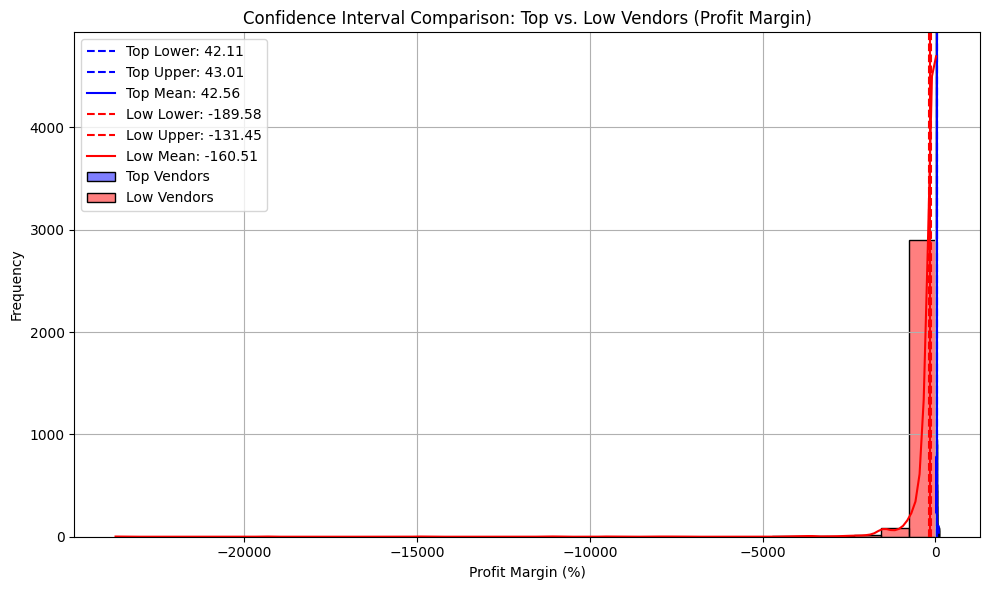

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

warnings.filterwarnings('ignore')

# --------------------------------------------
# ✅ STEP 1: Connect to your DB & load your data
# --------------------------------------------
# Example: Load final_summary table (adjust if your table name is different)
conn = sqlite3.connect('inventory.db')

df = pd.read_sql_query("SELECT * FROM final_summary", conn)

print("\n✅ Columns:", df.columns)

# --------------------------------------------
# ✅ STEP 2: Make sure ProfitMargin exists
# --------------------------------------------
# If it doesn't, calculate it:
if 'ProfitMargin' not in df.columns:
    df['GrossProfit'] = df['TotalSalesDollars'] - df['TotalPurchaseDollars']
    df['ProfitMargin'] = (df['GrossProfit'] / df['TotalSalesDollars']) * 100

print("\n✅ Added ProfitMargin column.")
print(df[['VendorName', 'ProfitMargin']].head())

# --------------------------------------------
# ✅ STEP 3: Split into Top & Low Vendors
# (Adjust threshold as needed)
# --------------------------------------------
top_vendors = df[df['ProfitMargin'] >= 20]
low_vendors = df[df['ProfitMargin'] < 20]

print("\n✅ Top Vendors:", top_vendors.shape)
print("✅ Low Vendors:", low_vendors.shape)

# --------------------------------------------
# ✅ STEP 4: Confidence Interval Function (Fixed)
# --------------------------------------------
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

# --------------------------------------------
# ✅ STEP 5: Compute CI for Top & Low Vendors
# --------------------------------------------
top_mean, top_lower, top_upper = confidence_interval(top_vendors['ProfitMargin'])
low_mean, low_lower, low_upper = confidence_interval(low_vendors['ProfitMargin'])

print(f"\n✅ Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"✅ Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

# --------------------------------------------
# ✅ STEP 6: Plot Histogram with CI Lines
# --------------------------------------------
plt.figure(figsize=(10, 6))

# Top Vendors
sns.histplot(top_vendors['ProfitMargin'], kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors
sns.histplot(low_vendors['ProfitMargin'], kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [117]:
# Is there a significant difference in profit margins betwwen top_performing and low_performing vendors?
top_threshold= df["TotalSalesDollars"].quantile(0.75)
low_threshold= df["TotalSalesDollars"].quantile(0.25)
top_vendors= df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors= df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()

# Perform Two Sample T test
t_stat, p_value, =ttest_ind(top_vendors, low_vendors, equal_var=False)

#Print Results
print(f"T-Statistic: {t_stat:4f}, P-Value: {p_value:4f}")
if p_value < 0.05:
    print("✅ Reject H0: There IS a significant difference in mean Profit Margin between top and low-performing vendors.")
else:
    print("✅ Fail to reject H0: There is NO significant difference in mean Profit Margin.")

T-Statistic: 9.722206, P-Value: 0.000000
✅ Reject H0: There IS a significant difference in mean Profit Margin between top and low-performing vendors.


In [118]:
brand_performance

,Description,TotalSalesDollars,ProfitMargin
6,12 Days of Pearls Gift Set,309.69,97.678323
8,13th Colony Sthrn Corn Whsky,359.82,42.446223
14,14 Hands Moscato,798.15,28.512184
18,14 Hands Rsl Wash,531.48,22.781666
35,2 Copas Spain White,119.88,33.333333
...,...,...,...
7692,Zoe Red by D Skouras,299.75,2.718932
7693,Zolo Malbec Rsv,713.63,21.169233
7694,Zonin Moscato,383.64,48.952143
7696,Zorah Red,417.81,67.559417


In [119]:
# Save brand_performance DataFrame to CSV
brand_performance.to_csv("brand_performance.csv", index=False)

In [121]:
purchase_contributions

[np.float64(1.451689556544813e-06),
 np.float64(8.361505385250894e-05),
 np.float64(3.8088955277982984e-05),
 np.float64(3.0392553814267954e-06),
 np.float64(0.0003398067643595481),
 np.float64(0.0001337818996493514),
 np.float64(0.05671929747382015),
 np.float64(0.005232484856883463),
 np.float64(1.9050464524377997e-05),
 np.float64(3.7486362248863163e-06),
 np.float64(99.93742563495047)]

In [122]:
import csv

# Save purchase_contributions to CSV
with open("purchase_contributions.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["VendorName", "Purchase_Contribution%"])
    for vendor, contribution in zip(vendors, purchase_contributions):
        writer.writerow([vendor, contribution])

In [124]:
# ✅ 1️⃣ Make sure StockTurnover exists
if 'StockTurnover' not in df.columns:
    df['StockTurnover'] = df['TotalSalesQuantity'] / df['TotalPurchaseQuantity']

# ✅ 2️⃣ Now you can filter it safely
low_turnover = df[df['StockTurnover'] < 1]

# ✅ 3️⃣ Save to CSV
low_turnover.to_csv("LowTurnover.csv", index=False)

print("✅ Low turnover vendors saved to LowTurnover.csv")


✅ Low turnover vendors saved to LowTurnover.csv
